# Plotting for Exploratory data analysis (EDA)


## Baisc Terminology

- What is EDA? <br>
- Data-point/vector <br>
- Data-set <br>
- Feature/ Variable/ Input variable/ Independent variable <br>
- Label/ Dependent vairable/ Output variable/ Class/ Class label/ Response label <br>
- Vector: 2D, 3D, 4D, ..., nD


- What is a 1D vector?<br>
=> Scalar


<b>Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.</b>    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

data = datasets.load_iris()

In [3]:
iris = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

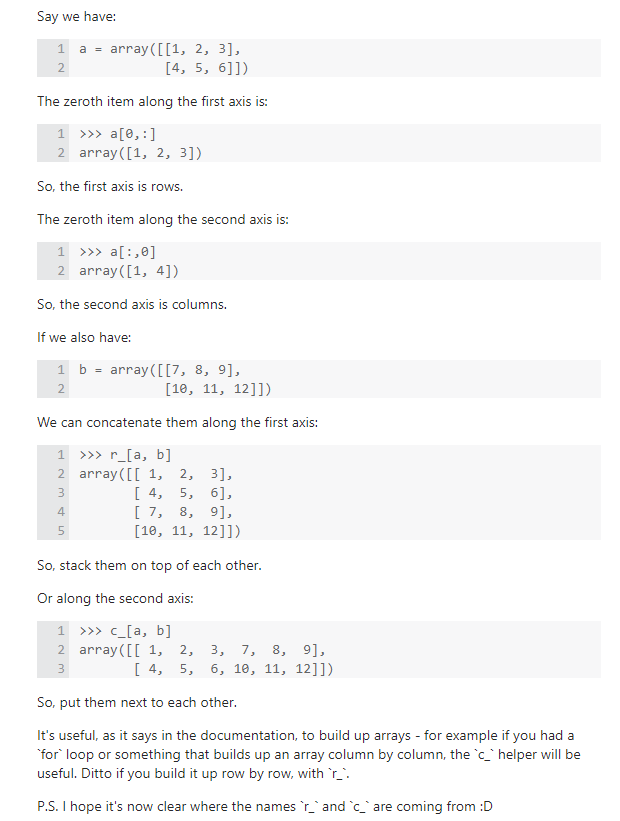

In [4]:
from IPython.display import Image
Image(filename='E:\CAPTURE\c_.png') 

Q.) How many data-points and features?

In [5]:
iris.shape

(150, 5)



Q.) What are the column name in our dataset?

In [6]:
print(iris.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


Q.) How many data points for each class are present? <br> <b>OR</b><br> Q.) How many flowers for each species are presents? 

In [7]:
iris['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

virginica: 2.0, versicolor: 1.0, setosa: 0.0

<u>Balance-dataset vs Imbalanced-dataset</u>

Iris is a balanced dataset as the number of the data points for every class is 50.

## 2D Scatter Plot

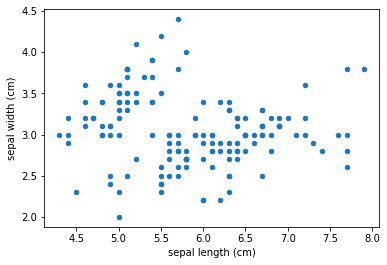

In [8]:
iris.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')
plt.show()

- 2D scatter plot with color-coding for each flower type/class.
- Here 'sns' corresponds to seaborn.

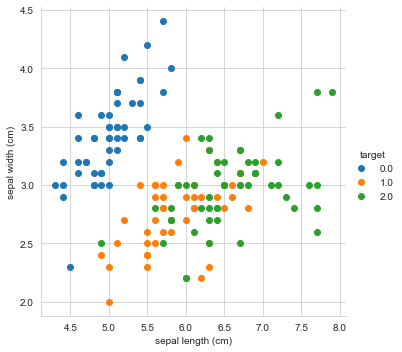

In [9]:
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue='target', height=5).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()

plt.show();

- Notice that the blue points can be easily seperated.
- from red and green by drawing a line.
- But red and green data points cannot be easily seperated.
- Can we draw multiple 2D scatter plots for each combination of features?


Q.) How many cobinations exits? 

=> 4C2 = 6


n! / r!(n-r)!

<b> Observation from above graph </b>

1. Using speal length (cm) and sepal width (cm) feature, we can distinguish setosa flower from others.<br>
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

In [10]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from mpl_toolkits.mplot3d import Axes3D

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(iris['target'].unique())):
    name = iris['target'].unique()[i]
    color = colors[i]
    x = iris[ iris['target'] == name ]['sepal length (cm)']
    y = iris[ iris['target'] == name ]['sepal width (cm)']
    z = iris[ iris['target'] == name ]['petal length (cm)']
    
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=4, color=color, line=dict(width=0) ) )
    data.append( trace )

    
layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            title = "SepalLengthCm",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title = "SepalWidthCm",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title = "PetalWidthCm",
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
iplot(fig, validate=True)

virginica: 2.0, versicolor: 1.0, setosa: 0.0

## Pair-Plot

<b>Pair-Plot is easy to understand when the dimensionality of the data is very small.<br> Work well till 4,5,6 dimension.<br>When we have higer dimension we can use PCA or t-SNE</b>

- Pairwise scatter plot: Pair-plot
    
    
- Dis-advantages :

    - Cannot be used when number of features are high.
    - Cannot visualize higher dimensional patterns in 3D and 4D.


- Only possible to view 2D patterns.

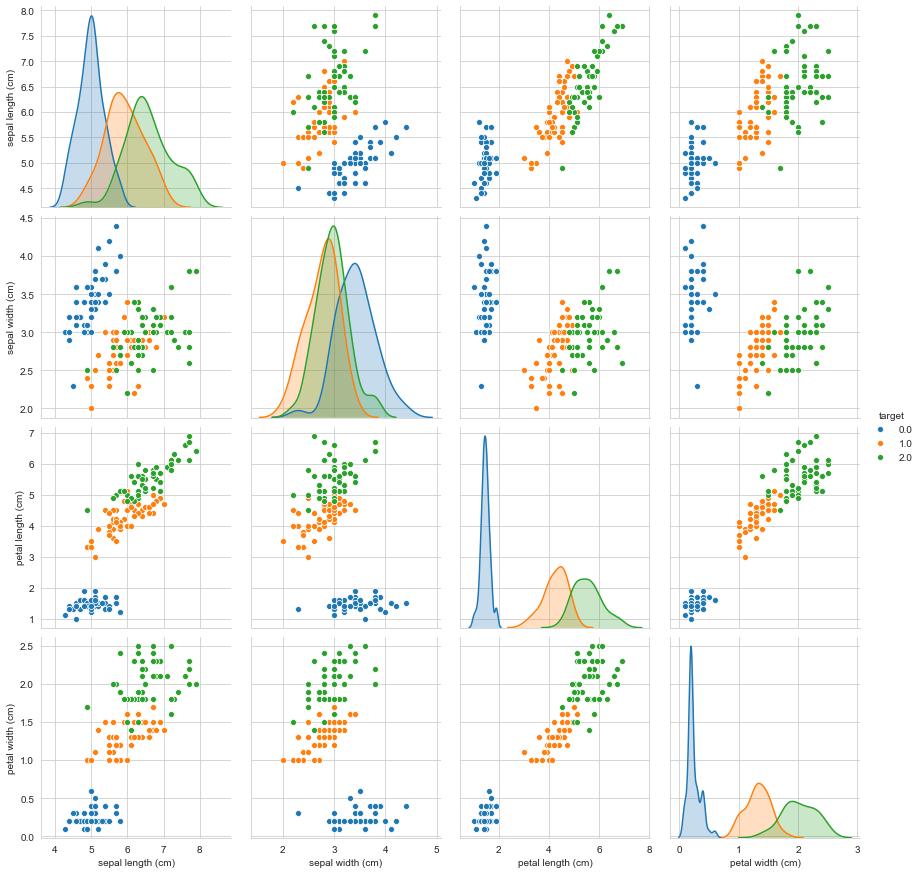

In [11]:
plt.close();

sns.set_style("whitegrid");
sns.pairplot(iris, hue='target', height=3)
plt.show()

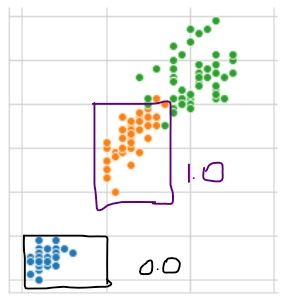

In [12]:
from IPython.display import Image
Image(filename='E:\CAPTURE\pl_pw_LI.jpg') 

<b>Observation:</b>

1. petal_length and petal_width are the most useful feature to identify various flower type.

2. While setosa can be easily identified (linearly seperable), virginica and versicolor have some overlap (almost linearly seperable).

3. We can find 'lines' and 'if-else' conditions to build a simple model to classify the flower types.

if petal_length <= 2 and petal_width <= 1:<br>
&emsp;    then setosa (0.0)
    
elif (petal_width < 2 and petal_width >= 1) and (petal_length < 5 and petal_length < 2.5):<br>
&emsp;    then versiocolor (1.0)

## Histogram, PDF, CDF

#### *** Histogram ***

- It will show the density of the points at perticular location.

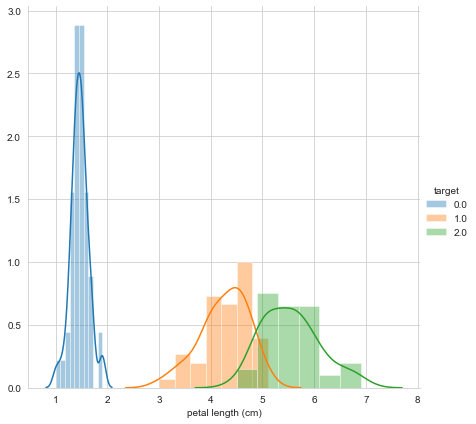

In [13]:
sns.FacetGrid(iris, hue='target', height=6).map(sns.distplot, 'petal length (cm)').add_legend();

plt.show()

<br>setosa: 0.0<br> versicolor: 1.0<br> virginica: 2.0

if petal length (cm) < 2:<br>
&emsp;(0.0) Setosa

Smooth line is called as PDF (Probability Density Function) it is a smooth formed of histogram.<br> We smooth histogram using KDE (Kernel Density Estimator)

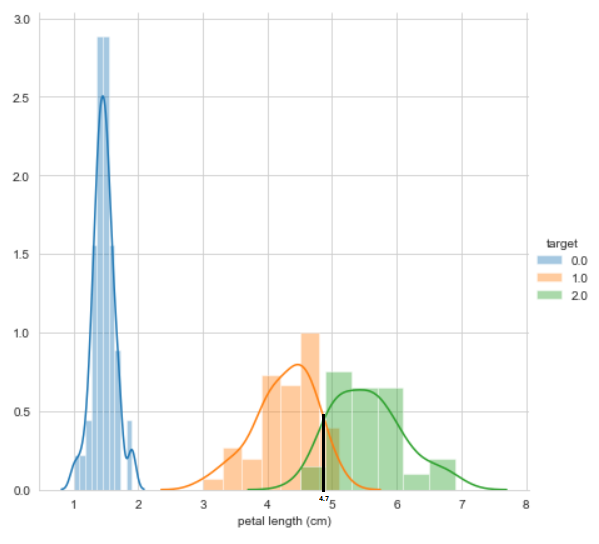

In [14]:
from IPython.display import Image
Image(filename='E:\CAPTURE\hist_example.png')

Since versicolor and verginica are overlapping we took threshold value as 4.7:

if petal length (cm) <= 2:<br>
&emsp;    setosa (0.0)<br>
else:<br>
&emsp;    if petal length (cm) < 4.7:<br>
&emsp;&emsp;        versicolor (1.0)<br>
&emsp;    else:<br>
&emsp;&emsp;        verginica (2.0)

### Univariate Analysis

- Means: One Vairable Analysis

#### *** PDF (Probability Distribution Fucntion) ***

Q.) Which of these variables 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' is <b>more</b> use full than other variables to distinguish between setosa: 0.0, versicolor: 1.0, and virginica: 2.0?

=> We can answer this question using simple univariate analysis using PDF or Histograms.

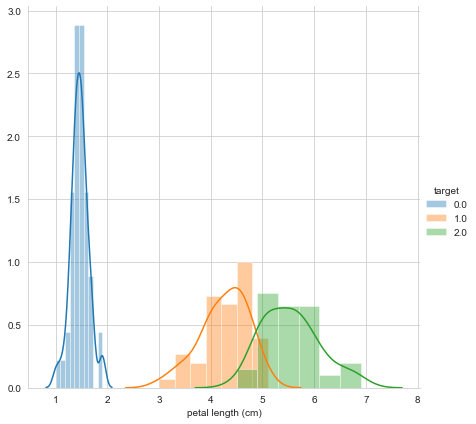

In [15]:
sns.FacetGrid(iris, hue='target', height=6).map(sns.distplot, 'petal length (cm)').add_legend();

plt.show()

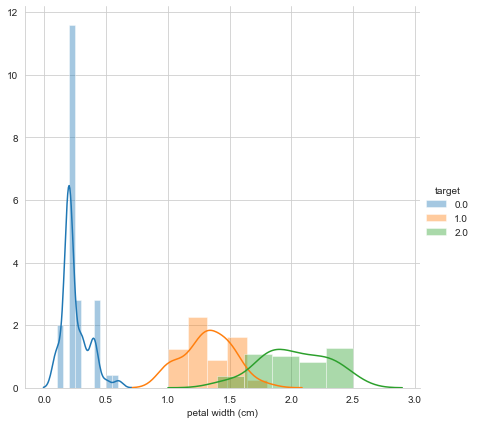

In [16]:
sns.FacetGrid(iris, hue='target', height=6).map(sns.distplot, 'petal width (cm)').add_legend();

plt.show()

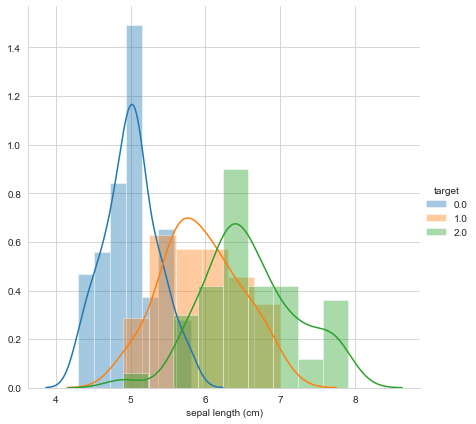

In [17]:
sns.FacetGrid(iris, hue='target', height=6).map(sns.distplot, 'sepal length (cm)').add_legend();

plt.show()

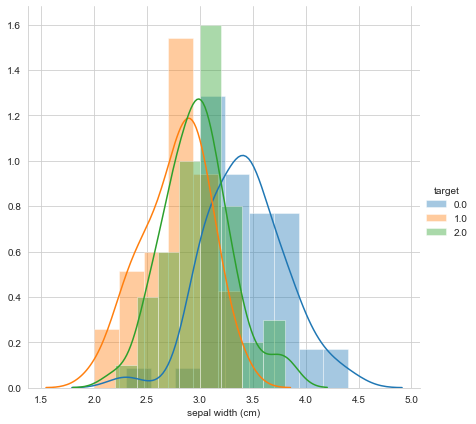

In [18]:
sns.FacetGrid(iris, hue='target', height=6).map(sns.distplot, 'sepal width (cm)').add_legend();

plt.show()

<B>Observation:</B><br>FROM THE ALL ABOVE GRAPHS WE CAN SAY THAT

petal length (cm) > petal width (cm) >> sepal length (cm) >> sepal width (cm)

&emsp;&emsp;&emsp;|&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; | <br>
&emsp;Most important&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Least Important   

#### *** CDF (Cumulative Distribution Function) ***

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


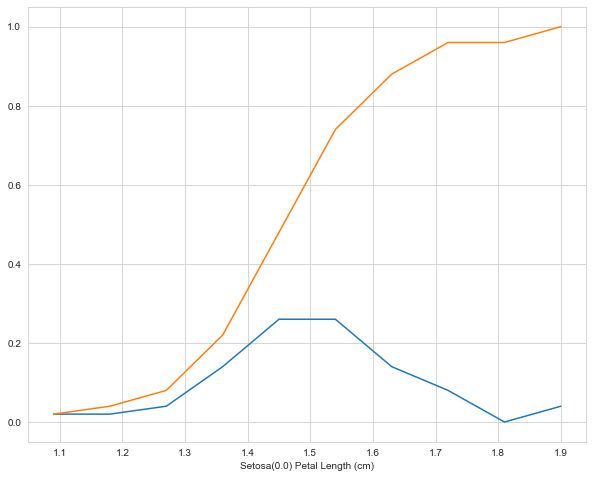

In [19]:
setosa_val = iris[ iris['target'] == 0.0 ]['petal length (cm)']

cnt, bin_edges = np.histogram(setosa_val, bins=10, density=True)

plt.figure(figsize=(10,8))
pdf = cnt / (sum(cnt))
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)           # cumsum : Cumulative Sum
plt.plot(bin_edges[1:],pdf)    # Blue Line
plt.plot(bin_edges[1:],cdf)    # Orange Line

plt.xlabel("Setosa(0.0) Petal Length (cm)")
plt.show()

<b>HOW TO READ PDF AND CDF</b>

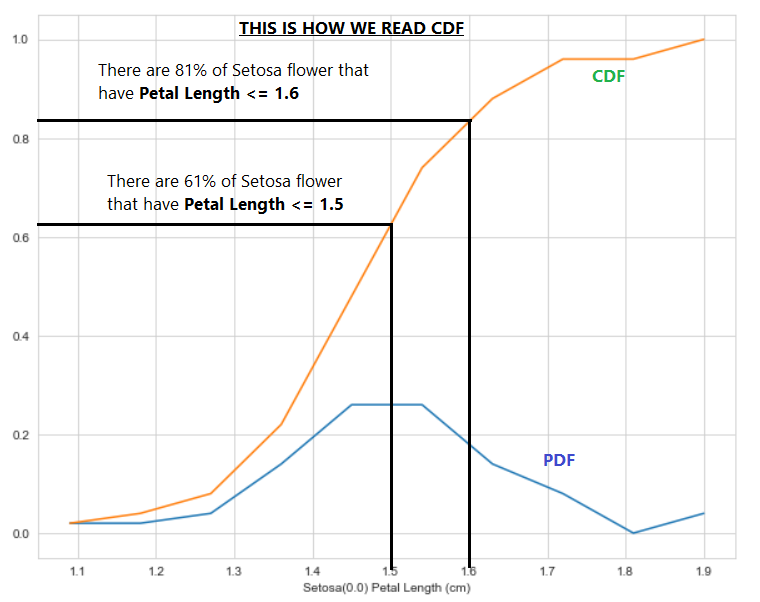

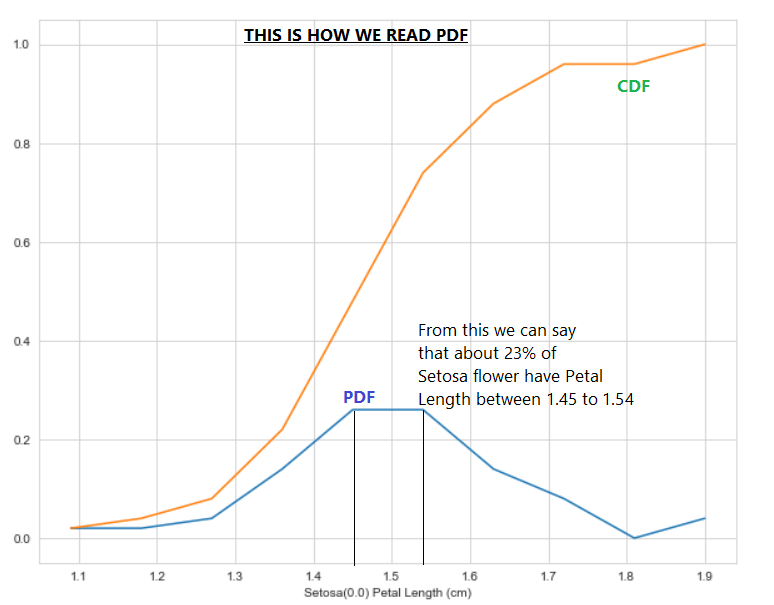

In [20]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='E:\CAPTURE\setosa_cdf_pdf.png') 
y = Image(filename='E:\CAPTURE\pdf_cdf_setosa_pdf.png') 
display(x, y)

<b>NOTE:</b>

Basically when you have a PDF the corresponding value of CDF is the area under the curve of your PDF till that point.

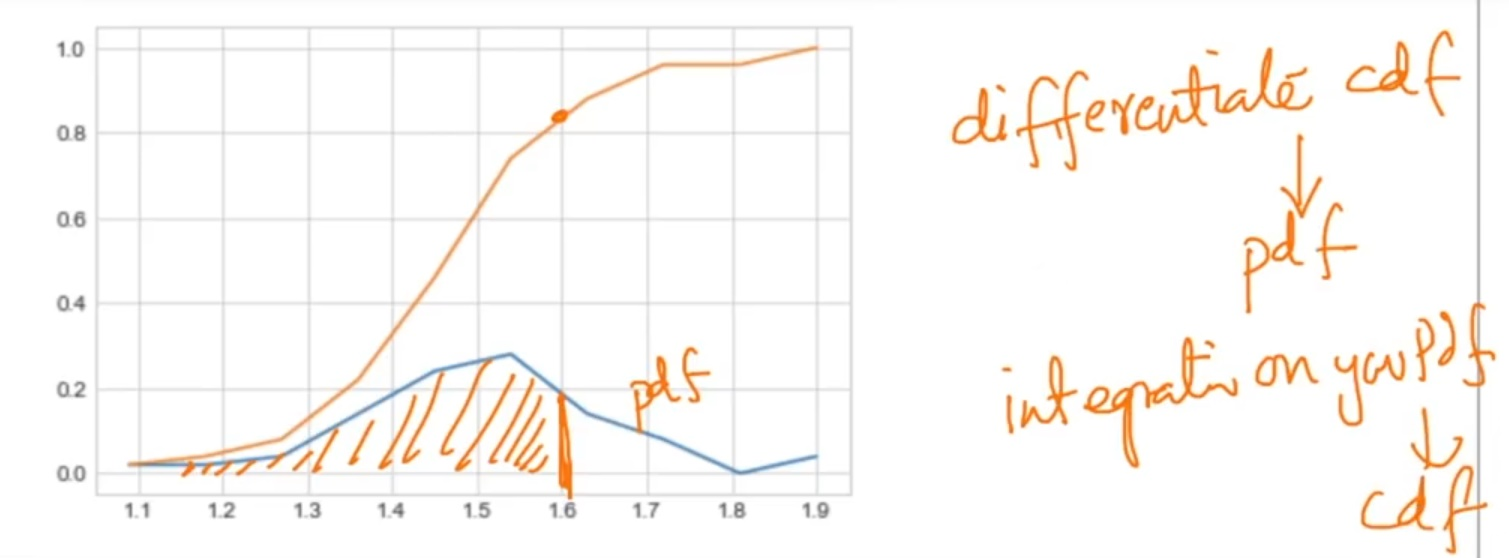

In [21]:
from IPython.display import Image
Image(filename='E:/CAPTURE/pdf_cdf_LI.jpg')

### Q.) Why is CDF is usefull for our iris dataset?

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


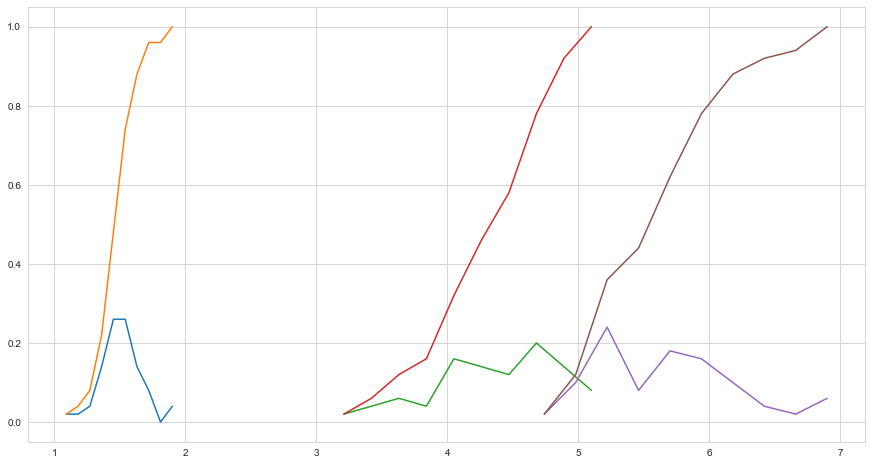

In [22]:
# Setosa
setosa_val = iris[ iris['target'] == 0.0 ]['petal length (cm)']

cnt, bin_edges = np.histogram(setosa_val, bins=10, density=True)

plt.figure(figsize=(15,8))
pdf = cnt / (sum(cnt))
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)           # cumsum : Cumulative Sum
plt.plot(bin_edges[1:],pdf)    # Blue Line
plt.plot(bin_edges[1:],cdf)    # Orange Line

# ----------------------------------------------------------------------------------------------

# Versicolor
versicolor_val = iris[ iris['target'] == 1.0 ]['petal length (cm)']
cnt, bin_edges = np.histogram(versicolor_val, bins=10, density=True)

pdf = cnt / (sum(cnt))
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)           # cumsum : Cumulative Sum
plt.plot(bin_edges[1:],pdf)    # Blue Line
plt.plot(bin_edges[1:],cdf)    # Orange Line

# ----------------------------------------------------------------------------------------------

# Virginica
virginica_val = iris[ iris['target'] == 2.0 ]['petal length (cm)']
cnt, bin_edges = np.histogram(virginica_val, bins=10, density=True)

pdf = cnt / (sum(cnt))
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)           # cumsum : Cumulative Sum
plt.plot(bin_edges[1:],pdf)    # Blue Line
plt.plot(bin_edges[1:],cdf)    # Orange Line


plt.show()

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Setosa&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Versicolor&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Virginica

if Petal Length < 2:<br>
&emsp;    Setosa (0.0)

elif Petal Length > 2 and Petal Length < 5:<br>
&emsp;    Versicolor (1.0)

elif Petal Length > 2 and Petal Length > 5:<br>
&emsp;    Verginica (2.0)

This show's how important is our CDF and PDF.

## Mean, Variance, and Standard-Deviation

In [23]:
setosa_val = iris[ iris['target'] == 0.0 ]['petal length (cm)']

# Mean
print("Means:")
print(np.mean(setosa_val))

# Mean with an outlier
print(np.mean(np.append(setosa_val,50)))
print(np.mean(virginica_val))
print(np.mean(versicolor_val))

print("\nStd-dev")
print(np.std(setosa_val))
print(np.std(virginica_val))
print(np.std(versicolor_val))

Means:
1.4620000000000002
2.4137254901960787
5.552
4.26

Std-dev
0.17191858538273286
0.5463478745268441
0.4651881339845204


<b>By Observing MEAN we can say that:</b>

Setosa have the smallest petal length & Virginica have the biggest petal length.

<b>By Observing Std-dev we can say that:</b>

Setosa have the thinnest spread & Virginica have the widest spread.


<b>MEAN, VARIANCE, STANDARD-DEVIATION can be correpted easily.</b>

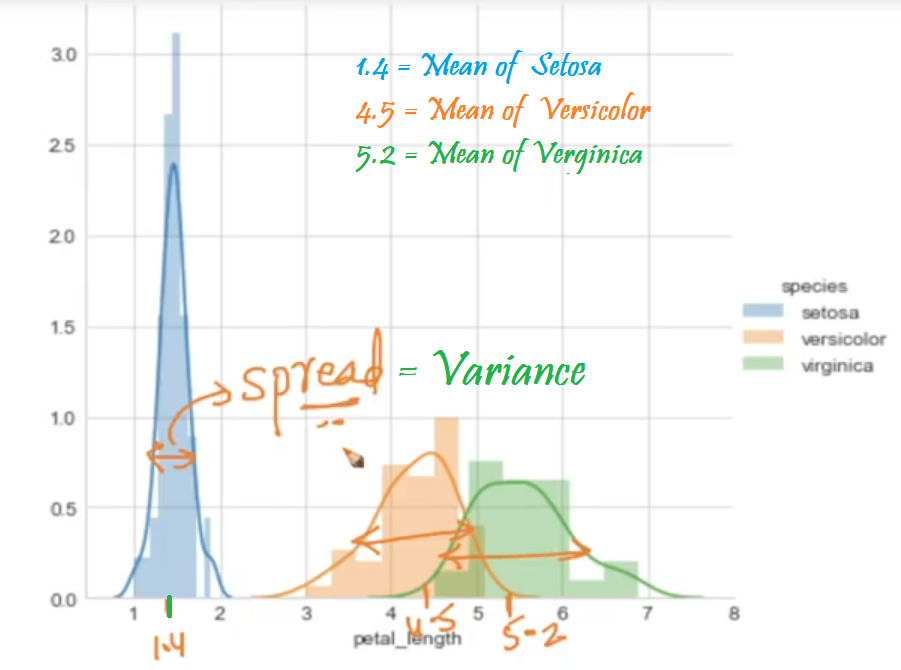

In [24]:
from IPython.display import Image
Image(filename='E:/CAPTURE/variance example.png')

## Median, Percentile, Quantile, IQR, MAD

To counter <b>Mean, Variance, Standard-Deviation</b> we will be using <b>Median, Percentile, Quantile, IQR, MAD</b>

In [25]:
print('\nMedian:')
print(np.median(setosa_val))

# Median with outliers
print(np.median(np.append(setosa_val,50)))
print(np.median(virginica_val))
print(np.median(versicolor_val))

# MEDIAN = Sort the list of number then, n+1/2
# If more than 50% of your values are correpted than median gets correpted.


print('\nQuantiles:')
print(np.percentile(setosa_val, np.arange(0, 100, 25)))
print(np.percentile(virginica_val, np.arange(0, 100, 25)))
print(np.percentile(versicolor_val, np.arange(0, 100, 25)))

print('\nPercentiles:')
print(np.percentile(setosa_val, 90))
print(np.percentile(virginica_val, 90))
print(np.percentile(versicolor_val, 90))

from statsmodels import robust
print('\nMean Absolute Deviation:')
print(robust.mad(setosa_val, 90))
print(robust.mad(virginica_val, 90))
print(robust.mad(versicolor_val, 90))


Median:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

Percentiles:
1.7
6.3100000000000005
4.8

Mean Absolute Deviation:
0.0011111111111111122
0.005000000000000002
0.003888888888888885


## Box plot and Whiskers

Box-plot with whiskers: another method of visualiing the 1-D scatter plot with the help of concept of Median, Percentile, Quantile.

<b>NOTE:</b> In the plot below, a technique call inter-quartile range is used in 

Whiskers in the plot below donot correspond to the min and max values


Box plot can be visualized as a PDF on the side ways

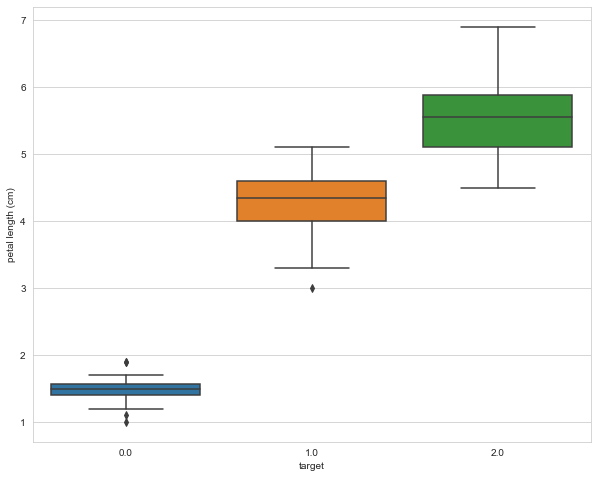

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target', y='petal length (cm)', data=iris)
plt.show()

if petal length (cm) < 5 & petal length (cm) > 2:<br>
&emsp;    versicolor<br>
elif pl >= 5:<br>
&emsp;    virginica<br>
else:<br>
&emsp;    setosa<br>


From this observation we can say that the 25% of my virginica (2.0) will be miss-classified as versicolor (1.0).

## Violan Plots

* A violan plots combines the benefits of the previous 2 plots i.e <b>Histogram and PDF</b> and simplifies them

* Denser regions of the data are fatter, and sparser ones thinner in a violin plot

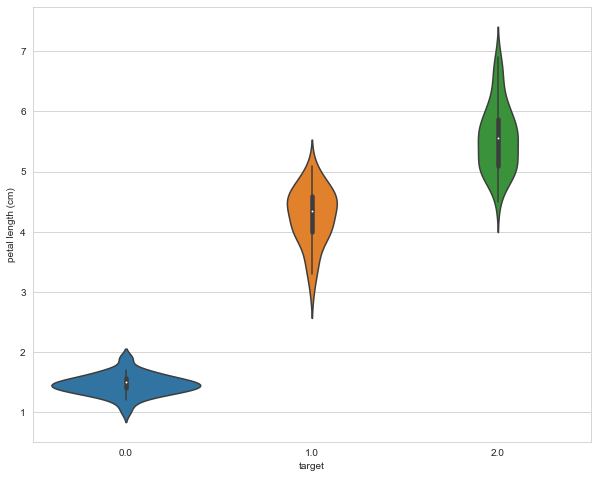

In [27]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'target', y = 'petal length (cm)', data = iris, size = 8)
plt.show()

## Multivariable Probability density, Contour plot.

<Figure size 720x576 with 0 Axes>

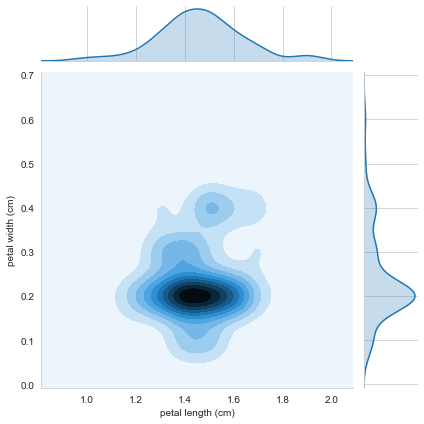

In [28]:
setosa = iris[iris['target']==0.0]

plt.figure(figsize=(10,8))
sns.jointplot(x = 'petal length (cm)', y = 'petal width (cm)', data = setosa, kind='kde')
plt.show()

<Figure size 720x576 with 0 Axes>

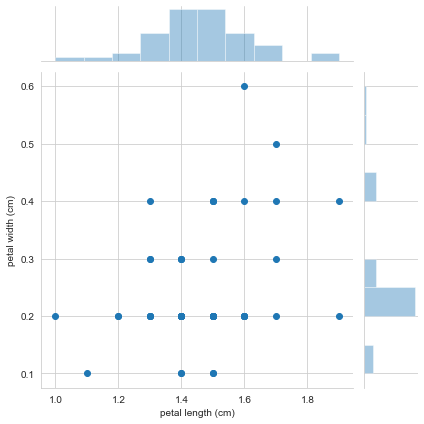

In [29]:
setosa = iris[iris['target']==0.0]

plt.figure(figsize=(10,8))
sns.jointplot(x = 'petal length (cm)', y = 'petal width (cm)', data = setosa, kind='scatter')
plt.show()

<Figure size 720x576 with 0 Axes>

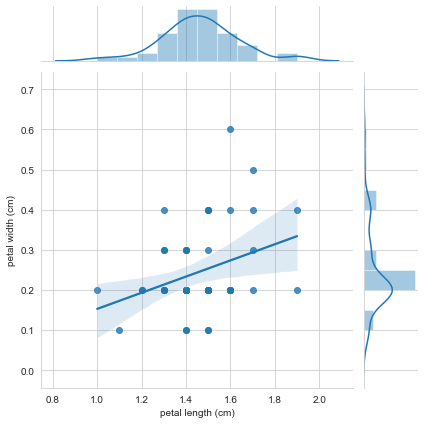

In [30]:
setosa = iris[iris['target']==0.0]

plt.figure(figsize=(10,8))
sns.jointplot(x = 'petal length (cm)', y = 'petal width (cm)', data = setosa, kind='reg')
plt.show()

<Figure size 720x576 with 0 Axes>

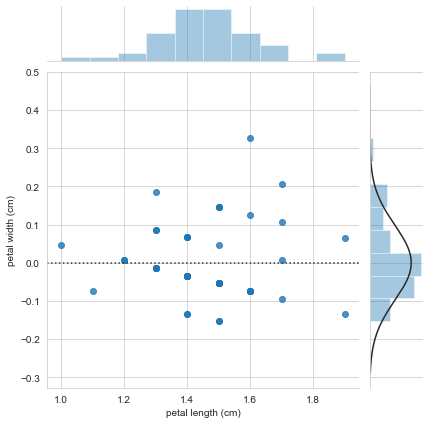

In [31]:
setosa = iris[iris['target']==0.0]

plt.figure(figsize=(10,8))
sns.jointplot(x = 'petal length (cm)', y = 'petal width (cm)', data = setosa, kind='resid')
plt.show()

<Figure size 720x576 with 0 Axes>

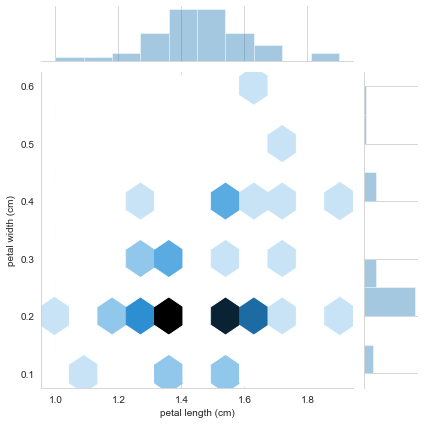

In [32]:
setosa = iris[iris['target']==0.0]

plt.figure(figsize=(10,8))
sns.jointplot(x = 'petal length (cm)', y = 'petal width (cm)', data = setosa, kind='hex')
plt.show()